<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/qNa_natural_language_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Natural Language Processing

## Importing the libraries

In [410]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


## Importing the dataset

In [411]:
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

## Cleaning the texts

In [412]:
import nltk
import re
nltk.download('stopwords')
corpus=[]
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
for i in range(0,1000):
# Removing Non Alpha Characters:
  review = re.sub('[^a-zA-Z]',' ',df['Review'][i])
# Convert whole Reviews intp lower case:
  review = review.lower()
# Splitting them word by work in a list:
  review = review.split()
# Removing Stopwords:
  ps  = PorterStemmer()
  all_stopwords = stopwords.words('english')
  all_stopwords.remove('not')
  all_stopwords.remove('nor')
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = " ".join(review)
  corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Creating the Bag of Words model

In [413]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(
    max_features=1566
)

X = cv.fit_transform(corpus).toarray()
y = df['Liked'].values

In [414]:
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(1000, 1566)

## Splitting the dataset into the Training set and Test set

In [415]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Let's Train Every Classisfication Model by creating a Pipeleine:

In [416]:
models= {
        "LR":LogisticRegression(max_iter=1500),
        "SVM-rbf":SVC(kernel='rbf'),
        "SVM-linear":SVC(kernel='linear'),
        "SVM-rbf":SVC(kernel='poly'),
        "SVM-gaussian":SVC(kernel='sigmoid'),
        "GNB":GaussianNB(),
        "RFC":RandomForestClassifier(),
        "DTC":DecisionTreeClassifier(),
}


In [417]:
results = []
for model_name, model in models.items():
    # Removed the CountVectorizer from the pipeline, as X_train and X_test are already vectorized.
    classifier_pipeline = Pipeline([
        ("classifier", model)
    ])

    classifier_pipeline.fit(X_train, y_train)
    y_pred = classifier_pipeline.predict(X_test)


    results.append({
        "Model": model_name,
        "Acc": accuracy_score(y_test, y_pred),
        "Prec": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1": f1_score(y_test, y_pred)
    })

# Print the results for all models
for result in results:
    print("--------------------")
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Acc']:.4f}")
    print(f"Precision: {result['Prec']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1 Score: {result['F1']:.4f}")
    print("--------------------")

--------------------
Model: LR
Accuracy: 0.7750
Precision: 0.8152
Recall: 0.7282
F1 Score: 0.7692
--------------------
--------------------
Model: SVM-rbf
Accuracy: 0.6300
Precision: 0.5879
Recall: 0.9417
F1 Score: 0.7239
--------------------
--------------------
Model: SVM-linear
Accuracy: 0.8000
Precision: 0.8182
Recall: 0.7864
F1 Score: 0.8020
--------------------
--------------------
Model: SVM-gaussian
Accuracy: 0.7750
Precision: 0.8625
Recall: 0.6699
F1 Score: 0.7541
--------------------
--------------------
Model: GNB
Accuracy: 0.7300
Precision: 0.6842
Recall: 0.8835
F1 Score: 0.7712
--------------------
--------------------
Model: RFC
Accuracy: 0.7500
Precision: 0.8630
Recall: 0.6117
F1 Score: 0.7159
--------------------
--------------------
Model: DTC
Accuracy: 0.7350
Precision: 0.7717
Recall: 0.6893
F1 Score: 0.7282
--------------------


In [418]:
results_df =  pd.DataFrame(results)
print(results_df.round(4))

          Model    Acc    Prec  Recall      F1
0            LR  0.775  0.8152  0.7282  0.7692
1       SVM-rbf  0.630  0.5879  0.9417  0.7239
2    SVM-linear  0.800  0.8182  0.7864  0.8020
3  SVM-gaussian  0.775  0.8625  0.6699  0.7541
4           GNB  0.730  0.6842  0.8835  0.7712
5           RFC  0.750  0.8630  0.6117  0.7159
6           DTC  0.735  0.7717  0.6893  0.7282


# Let's observe some top Positive and Top Negative Comments:

In [419]:
feature_names = cv.get_feature_names_out()

# Select Logistic Regression model for coefficient analysis
# Note: only linear models like LogisticRegression have a 'coef_' attribute after fitting
lr_model = LogisticRegression(max_iter=1500, class_weight='balanced')
lr_pipeline = Pipeline([
    ("classifier", lr_model)
])
lr_pipeline.fit(X_train, y_train)

# Get coefficients from the fitted Logistic Regression model
coefs = lr_pipeline.named_steps['classifier'].coef_[0]

top_negative = sorted(
    zip(feature_names, coefs),
    key=lambda x: x[1]
)[:10]

top_positive = sorted(
    zip(feature_names, coefs),
    key=lambda x: x[1],
    reverse=True
)[:10]

print("Negative words:", top_negative)
print("Positive words:", top_positive)

Negative words: [('not', np.float64(-1.9409223520592132)), ('worst', np.float64(-1.3317807269266573)), ('bad', np.float64(-1.3301258592296146)), ('terribl', np.float64(-1.175608838004362)), ('slow', np.float64(-1.1421002898560983)), ('minut', np.float64(-1.1258654287956391)), ('poor', np.float64(-1.1118998093625871)), ('noth', np.float64(-1.0999242450524085)), ('bland', np.float64(-1.0946041331397285)), ('rude', np.float64(-1.088124608482346))]
Positive words: [('great', np.float64(2.682535212043935)), ('delici', np.float64(1.944496621748662)), ('good', np.float64(1.6421419542825813)), ('love', np.float64(1.5452382310984607)), ('friendli', np.float64(1.5091947832200767)), ('amaz', np.float64(1.4934808401315636)), ('fantast', np.float64(1.3749912273454035)), ('nice', np.float64(1.2806290599251695)), ('awesom', np.float64(1.280055666107813)), ('happi', np.float64(1.2588623119593658))]


## Making the Confusion Matrix

[[76 21]
 [32 71]]
0.735


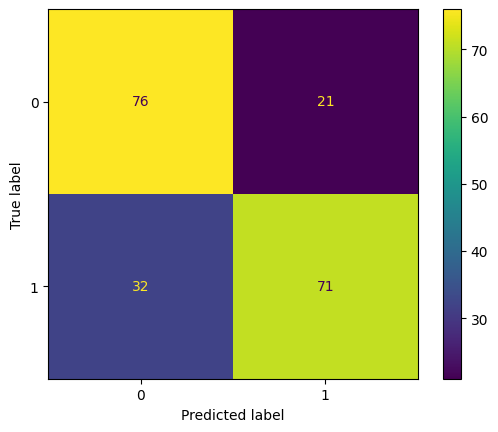

In [420]:
from sklearn.metrics import confusion_matrix, accuracy_score,ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)


In [421]:
print(X_test)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


## Predicting if a single review is positive or negative

### Positive review

Use our model to predict if the following review:

"I love this restaurant so much"
" This Restaurant Has so much Delicious Fodd"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

In [422]:
new_review = "this restaurant has so much delicious food"
new_review = re.sub('[^a-zA-Z]',' ',new_review)
new_review = new_review.lower().split()
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = " ".join(new_review)
new_corpus = [new_review]
X_new = cv.transform(new_corpus).toarray() # Changed fit_transform to transform
y_new_pred = classifier_pipeline.predict(X_new)
print(y_new_pred)


[1]


In [442]:
new_review = "Restaurant is lovely"
new_review = re.sub('[^a-zA-Z]',' ',new_review)
new_review = new_review.lower().split()
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = " ".join(new_review)
new_corpus = [new_review]
X_new = cv.transform(new_corpus).toarray() # Changed fit_transform to transform
y_new_pred = classifier_pipeline.predict(X_new)
print(y_new_pred)

[0]


The review was correctly predicted as positive by our model.

### Negative review

Use our model to predict if the following review:

"I hate this restaurant so much"

is positive or negative.

**Solution:** We just repeat the same text preprocessing process we did before, but this time with a single review.

The review was correctly predicted as negative by our model.

In [424]:
new_corpus = []
new_review = "I hate this restaurant so much"
new_review = re.sub('[^a-zA-Z]',' ',new_review)
new_review = new_review.lower().split()
new_review = [ps.stem(word) for word in new_review if not word in set(all_stopwords)]
new_review = " ".join(new_review)
new_corpus = [new_review] # Fix: Assign directly instead of using append() and reassigning None
X_new = cv.transform(new_corpus).toarray() # Fix: Changed fit_transform to transform
y_new_pred = classifier_pipeline.predict(X_new)
print(y_new_pred)

[0]


In [429]:
custom_df = pd.DataFrame({
    "review": [
        "I like this restaurant",
        "Worst food ever",
        "The service was okay",
        "Absolutely loved the food"
    ],
    "label": [1, 0, 0, 1]  # your judgment
})

# Preprocess the custom reviews
cleaned_custom_reviews = []
for review_text in custom_df["review"]:
    review = re.sub('[^a-zA-Z]',' ',review_text)
    review = review.lower().split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = " ".join(review)
    cleaned_custom_reviews.append(review)

# Transform the cleaned custom reviews using the fitted CountVectorizer
X_custom = cv.transform(cleaned_custom_reviews).toarray()

from sklearn.metrics import accuracy_score, classification_report

y_pred = classifier_pipeline.predict(X_custom)

print("Accuracy:", accuracy_score(custom_df["label"], y_pred))
print(classification_report(custom_df["label"], y_pred))

Accuracy: 0.75
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4

